# CHE1147 Data Mining in Engineering
### Assignment 3 Jialin Shang 1005086256
## 1 Feature Engineering
### 1.1 Import the data and create the anchor date columns
1. Import the dataset as txn and identify the number of rows.

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing as prep
import matplotlib.pyplot as plt

In [2]:
txn = pd.read_csv("Retail_Data_Transactions.csv")
txn.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [3]:
print('The number of the rows of the dataset txn is', txn.shape[0])

The number of the rows of the dataset txn is 125000


2. The date-format in column 'trans date' is not standard. Create a new column 'txn date'
from 'trans date' with pd.to datetime and drop the column 'trans date'.

In [4]:
date = np.array(txn['trans_date'])
new_date = pd.to_datetime(date)
txn.drop('trans_date',axis = 1, inplace = True)
txn['txn_date'] = new_date
txn.head()

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20


3. Identify the min() and max() of column 'txn date'.

In [5]:
print('The minimum of column txn_date is', min(new_date))
print('The maximum of column txn_date is', max(new_date))

The minimum of column txn_date is 2011-05-16 00:00:00
The maximum of column txn_date is 2015-03-16 00:00:00


4. Create the column 'ME DT': the last day of the month in the 'trans date' column.
DateO set objects is a simple way to do this in pandas.

In [6]:
ME_DT = []
rr = 125000
for r in range(rr):
  t = (pd.Timestamp(new_date[r]) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
  ME_DT.append(t)

ME_DT = np.array(ME_DT)
txn["ME_DT"] = ME_DT
txn.head()

,customer_id,tran_amount,txn_date,ME_DT
0,CS5295,35,2013-02-11,2013-02-28
1,CS4768,39,2015-03-15,2015-03-31
2,CS2122,52,2013-02-26,2013-02-28
3,CS1217,99,2011-11-16,2011-11-30
4,CS1850,78,2013-11-20,2013-11-30


5. Create the column 'YEAR': the year in the 'trans date' column. DatetimeIndex with
attribute .year will help you do so.

In [7]:
nd = pd.Series(new_date)
y = np.array(nd.dt.year)
txn['YEAR'] = y
txn.head()

,customer_id,tran_amount,txn_date,ME_DT,YEAR
0,CS5295,35,2013-02-11,2013-02-28,2013
1,CS4768,39,2015-03-15,2015-03-31,2015
2,CS2122,52,2013-02-26,2013-02-28,2013
3,CS1217,99,2011-11-16,2011-11-30,2011
4,CS1850,78,2013-11-20,2013-11-30,2013


### 1.2 Create features that capture annual spending
1. Using groupby and NamedAgg create clnt annual aggregations, the annual aggre-
gations dataframe: with sum, mean, std, var, sem, max, min, count as the aggregation
functions. A snapshot of the output table is shown below. Notice that the output is a
typical MultiIndex pandas dataframe.

In [8]:
clnt_annual_aggregations = txn.groupby(['customer_id','YEAR']).agg(
              ann_txn_amt_sum = pd.NamedAgg(column = 'tran_amount', aggfunc = 'sum'),
              ann_txn_amt_avg = pd.NamedAgg(column = 'tran_amount', aggfunc = 'mean'),
              ann_txn_amt_std = pd.NamedAgg(column = 'tran_amount', aggfunc = 'std'),
              ann_txn_amt_var = pd.NamedAgg(column = 'tran_amount', aggfunc = 'var'),
              ann_txn_amt_sem = pd.NamedAgg(column = 'tran_amount', aggfunc = 'sem'),
              ann_txn_amt_max = pd.NamedAgg(column = 'tran_amount', aggfunc = 'max'),
              ann_txn_amt_min = pd.NamedAgg(column = 'tran_amount', aggfunc = 'min'),
              ann_txn_amt_cnt = pd.NamedAgg(column = 'tran_amount', aggfunc = 'count'),)
clnt_annual_aggregations.head()

ann_txn_amt_sum  ann_txn_amt_avg  ann_txn_amt_std  \
customer_id YEAR                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id YEAR                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   

                  ann_txn_amt_min  ann_txn_amt_cnt  
customer_id YEAR                                    
CS1112      2011               56                3  
            2012               52                5  
            2013               36                3  
            2014               59                3  
            2015               39                1

2. Plot the histogram of the sum and count.

Text(0.5, 1.0, 'Sum')

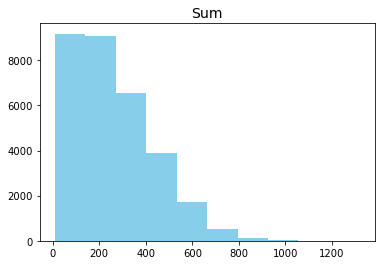

In [9]:
s = np.array(clnt_annual_aggregations['ann_txn_amt_sum'])
c = np.array(clnt_annual_aggregations['ann_txn_amt_sum'])

plt.hist(s, color = 'skyblue')
plt.title('Sum', fontsize = 14)

Text(0.5, 1.0, 'Count')

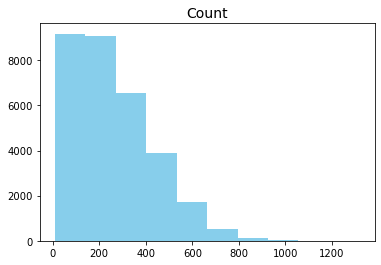

In [10]:
plt.hist(c, color = 'skyblue')
plt.title('Count', fontsize = 14)

3. Reset the index and reshape the table with the pivot table function to create the
clnt annual aggregations pivot table shown below with 40 columns (why 40?).
You should expect columns with NaN values. Impute the NaN entries when you
perform the pivot table function and explain your choice of values.

In [11]:
clnt_annual_aggregations_pt = clnt_annual_aggregations.reset_index().pivot_table(columns = 'YEAR', index = 'customer_id').fillna(0)
clnt_annual_aggregations_pt.head()

ann_txn_amt_avg                                              \
YEAR                   2011       2012       2013       2014       2015   
customer_id                                                               
CS1112            70.666667  67.400000  70.666667  70.666667  39.000000   
CS1113            81.333333  74.800000  85.200000  56.500000  73.333333   
CS1114            85.200000  75.000000  70.400000  70.833333  79.000000   
CS1115            87.000000  67.571429  79.571429  78.250000  55.000000   
CS1116            58.750000  76.666667  59.000000  66.600000   0.000000   

            ann_txn_amt_cnt                      ... ann_txn_amt_sum         \
YEAR                   2011 2012 2013 2014 2015  ...            2011   2012   
customer_id                                      ...                          
CS1112                  3.0  5.0  3.0  3.0  1.0  ...           212.0  337.0   
CS1113                  3.0  5.0  5.0  4.0  3.0  ...           244.0  374.0   
CS1114                  5.0  2.0  5.0  6.0  1.0  ...           426.0  150.0   
CS1115                  3.0  7.0  7.0  4.0  1.0  ...           261.0  473.0   
CS1116                  4.0  3.0  1.0  5.0  0.0  ...           235.0  230.0   

                                 ann_txn_amt_var                           \
YEAR          2013   2014   2015            2011        2012         2013   
customer_id                                                                 
CS1112       212.0  212.0   39.0      485.333333  161.800000  1190.333333   
CS1113       426.0  226.0  220.0      444.333333  290.200000   171.200000   
CS1114       352.0  425.0   79.0       94.700000  968.000000   619.300000   
CS1115       557.0  313.0   55.0      225.000000  477.285714   110.952381   
CS1116        59.0  333.0    0.0      449.583333  908.333333     0.000000   

                                     
YEAR               2014        2015  
customer_id                          
CS1112       284.333333    0.000000  
CS1113       781.666667  745.333333  
CS1114       726.166667    0.000000  
CS1115       512.250000    0.000000  
CS1116       636.800000    0.000000  

[5 rows x 40 columns]

4. The pivoted object you created is a MultiIndex object with hierarchical indexes. You
can see the first level (i.e. 0) in the snapshot above with names ’ann txn amt ave’,
’ann txn amt max’ (and more as indicated by the ...) and the second level (i.e. 1)
with names ’2011’, ’2012’, etc. You can confirm the multiple levels of the columns with
the following two expressions.
What are your observations regarding the number of levels and the column names?

In [12]:
clnt_annual_aggregations_pt.columns.nlevels

2

In [13]:
clnt_annual_aggregations_pt.columns

MultiIndex([('ann_txn_amt_avg', 2011),
            ('ann_txn_amt_avg', 2012),
            ('ann_txn_amt_avg', 2013),
            ('ann_txn_amt_avg', 2014),
            ('ann_txn_amt_avg', 2015),
            ('ann_txn_amt_cnt', 2011),
            ('ann_txn_amt_cnt', 2012),
            ('ann_txn_amt_cnt', 2013),
            ('ann_txn_amt_cnt', 2014),
            ('ann_txn_amt_cnt', 2015),
            ('ann_txn_amt_max', 2011),
            ('ann_txn_amt_max', 2012),
            ('ann_txn_amt_max', 2013),
            ('ann_txn_amt_max', 2014),
            ('ann_txn_amt_max', 2015),
            ('ann_txn_amt_min', 2011),
            ('ann_txn_amt_min', 2012),
            ('ann_txn_amt_min', 2013),
            ('ann_txn_amt_min', 2014),
            ('ann_txn_amt_min', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
            ('ann_txn_amt

In [14]:
print(clnt_annual_aggregations_pt.columns.shape[0])

40


We can observe that there are 40 columns and 5 different years. Since they are tuples. they exactly match with the number of elements in each column name. 

5. Finally, you want to save the dataframe clnt annual aggregations pivot as an
.xlsx file for future use in the machine learning assignment. To do so, you want
to remove the two levels in columns and create a single level with column names:
’ann txn amt ave 2011’, ’ann txn amt ave 2012’, etc. To do so, use the code snippet
below prior to saving the dataframe as an Excel file. Describe what each line of code in the box does and save the output dataframe as
an Excel file annual features.xlsx. A snapshot of the desired final output is shown
below.

In [15]:
level_0 = clnt_annual_aggregations_pt.columns.get_level_values(0).astype(str)
level_1 = clnt_annual_aggregations_pt.columns.get_level_values(1).astype(str)
clnt_annual_aggregations_pt.columns = level_0 + '-' + level_1
clnt_annual_aggregations_pt.head()

,ann_txn_amt_avg-2011,ann_txn_amt_avg-2012,ann_txn_amt_avg-2013,ann_txn_amt_avg-2014,ann_txn_amt_avg-2015,ann_txn_amt_cnt-2011,ann_txn_amt_cnt-2012,ann_txn_amt_cnt-2013,ann_txn_amt_cnt-2014,ann_txn_amt_cnt-2015,...,ann_txn_amt_sum-2011,ann_txn_amt_sum-2012,ann_txn_amt_sum-2013,ann_txn_amt_sum-2014,ann_txn_amt_sum-2015,ann_txn_amt_var-2011,ann_txn_amt_var-2012,ann_txn_amt_var-2013,ann_txn_amt_var-2014,ann_txn_amt_var-2015
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3.0,5.0,3.0,3.0,1.0,...,212.0,337.0,212.0,212.0,39.0,485.333333,161.800000,1190.333333,284.333333,0.000000
CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3.0,5.0,5.0,4.0,3.0,...,244.0,374.0,426.0,226.0,220.0,444.333333,290.200000,171.200000,781.666667,745.333333
CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5.0,2.0,5.0,6.0,1.0,...,426.0,150.0,352.0,425.0,79.0,94.700000,968.000000,619.300000,726.166667,0.000000
CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3.0,7.0,7.0,4.0,1.0,...,261.0,473.0,557.0,313.0,55.0,225.000000,477.285714,110.952381,512.250000,0.000000
CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4.0,3.0,1.0,5.0,0.0,...,235.0,230.0,59.0,333.0,0.0,449.583333,908.333333,0.000000,636.800000,0.000000


Extract two lines from the two levels of columns and convert them into type string, labeling the name as 'level_0' & 'level_1'. Then combine these two levels together, change the column name of clnt_annual_aggregations_pt.  

In [16]:
clnt_annual_aggregations_pt.to_excel("annual_features.xlsx") 

6. What are the possible disadvantages in capturing client transaction behavior with the
annual features described in this section (if any)?

Answer: The annual features are not suitable to describe the client transaction behavior because it is too broad.

### 1.3 Create monthly aggregations
1. Create the dataframe that captures the monthly sum and count of transactions per client (name it clnt monthly aggregations). Use the groupby function with the Named Aggregation feature which was introduced in pandas version 0.25.0. Make sure that you name the columns as shown in the figure sample on the right.

2. Create a histogram of both columns you cre-ated. What are your observations? What are the most common and maximum values for each column? How do they compare with the ones in section 1.2?

The output dataframe should look like the snap- shot shown on the right for client with ID CS1112 (confirm this with slicing your output dataframe). Most clients in this dataset shop a few times a year. For example, the client with ’customer id’ CS1112 shown here made purchases in 15 out of 47 months of data in the txn table. The information in this dataset is ”irregular”; some clients may have an entry for a month, while others do not have an entry (e.g. when they don’t shop for this particular month).

In [17]:
cma = txn.groupby(['customer_id','ME_DT']).agg(mth_txn_amt_sum = pd.NamedAgg(column = 'tran_amount',aggfunc = 'sum'),
                                                                     mth_txn_cnt = pd.NamedAgg(column = 'tran_amount',aggfunc = 'count'))
cma.loc['CS1112']

,mth_txn_amt_sum,mth_txn_cnt
ME_DT,,
2011-06-30,56,1
2011-08-31,96,1
2011-10-31,60,1
2012-04-30,56,1
2012-06-30,52,1
2012-07-31,81,1
2012-09-30,72,1
2012-12-31,76,1
2013-03-31,105,1


Text(0.5, 1.0, 'Sum')

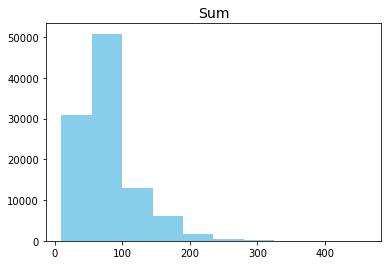

In [18]:
s1 = np.array(cma['mth_txn_amt_sum'])
c1 = np.array(cma['mth_txn_cnt'])

plt.hist(s1, color = 'skyblue')
plt.title('Sum', fontsize = 14)

Text(0.5, 1.0, 'Count')

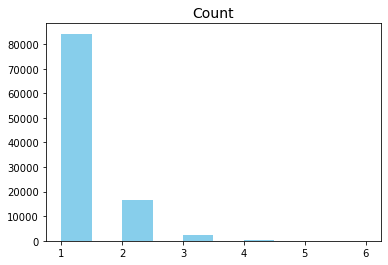

In [19]:
plt.hist(c1, color = 'skyblue')
plt.title('Count', fontsize = 14)

In [20]:
print(max(s1))
print(max(c1))

460
6


Answer: The range of the monthly sum of each client everymonth is at the range between 50 and 100, approximately have 5000 entries; the maximum number of the column 'mth_txn_amt_sum' is 460; the range of the monthly transaction count of each client everymonth mostly located at the count number of 1, approximately over 80000 counts, the maximum number of the column 'mth_txn_cnt' is 6. It is good to go with the monthly data instead of annual data becasuse the customer behavior can be various over time.

### 1.4 Create the base table for the rolling window features

In order to create the rolling window features (more on this in the next section), you need
to create a base table with all possible combinations of ’customer id’ and ’ME DT’. For
example, customer CS1112 should have 47 entries, one for each month, in which 15 will have
the value of transaction amount and the rest 32 will have zero value for transaction amount.
This will essentially help you convert the ”irregular” clnt monthly aggregations table
into a ”regular” one.

1. Create the numpy array of the unique elements in columns ’customer id’ and ’ME DT’
of the txn table you created in section 1.1. Confirm that you have 6,889 unique clients
and 47 unique month-end-dates.

In [21]:
customer_id = list(np.array(txn["customer_id"]))
ME_DT = list(np.array(txn["ME_DT"]))

print("The number of the unique clients is ", len(set(customer_id)))
print("The number of the unique month-end-dates is",len(set(ME_DT)))

The number of the unique clients is  6889
The number of the unique month-end-dates is 47


2. Use itertools.product to generate all the possible combinations of ’customer id’ and
’ME DT’. Itertools is a Python module that iterates over data in a computation-
ally efficient way. You can perform the same task with a for-loop, but the execution may be inefficient. For a brief overview of the Itertools module see here. If you
named the numpy arrays with the unique elements: clnt no and me dt, then the
code below will create an itertools.product object (you can confirm this by running:
type(base table)).

In [22]:
from itertools import product

clnt_no = np.array(list(set(customer_id)))
me_dt = np.array(list(set(ME_DT)))
me_dt = sorted(me_dt)

base_table = product(clnt_no, me_dt)
base_table

3. Next, you want to convert the itertools.product object base table into a pandas ob-
ject called base table pd. To do so, use pd.DataFrame.from records and name the
columns ’CLNT NO’ and ’ME DT’.

In [23]:
base_table_pd = pd.DataFrame.from_records(base_table, columns = ["CLNT_NO","ME_DT"])
base_table_pd

,CLNT_NO,ME_DT
0,CS5529,2011-05-31
1,CS5529,2011-06-30
2,CS5529,2011-07-31
3,CS5529,2011-08-31
4,CS5529,2011-09-30
...,...,...
323778,CS5229,2014-11-30
323779,CS5229,2014-12-31
323780,CS5229,2015-01-31
323781,CS5229,2015-02-28


4. Finally, you want to validate that you created the table you originally wanted. There are two checks you want to perform:

Filter client CS1112 and confirm that the dates fall between the min and max
month-dates you identified in section 1.1. Also, confirm that the snapshot of client
CS1112 has 47 rows, one for each month in the dataset.

Confirm that the base table pd has 323,783 rows, which is the expected value
of combinations for 6,889 unique clients and 47 unique month-end dates.

In [24]:
print('The maximum month-date of CS1112 is:', base_table_pd[base_table_pd['CLNT_NO'] == 'CS1112']['ME_DT'].max())
print('The minimum month-date of CS1112 is:', base_table_pd[base_table_pd['CLNT_NO'] == 'CS1112']['ME_DT'].min())
print('There are ', len(base_table_pd[base_table_pd['CLNT_NO'] == 'CS1112']),'rows of client CS1112.')
print('There are ', base_table_pd['CLNT_NO'].nunique(), 'unique month-end dates.')

The maximum month-date of CS1112 is: 2015-03-31
The minimum month-date of CS1112 is: 2011-05-31
There are  47 rows of client CS1112.
There are  6889 unique month-end dates.


### 1.5 Create the monthly rolling window features
With the base table pd as a starting point you can convert the irregular transaction data
into the typical time series data; data captured at equal intervals. Feature engineering of
time series data gives you the potential to build very powerful predictive models.

1. Left-join the base table pd with the clnt monthly aggregations table from section
1.3 on [CLNT NO, ME DT] to create the table base clnt mth. Comment on the
following questions in Markdown:

In [25]:
cma.index.set_names(['CLNT_NO','ME_DT'], inplace = True)
base_clnt_mth = pd.merge(base_table_pd, cma, how = 'left',on = ['CLNT_NO','ME_DT']).replace(np.nan, 0)
print(len(base_table_pd))
print(len(cma))
base_clnt_mth

323783
103234


,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5529,2011-05-31,103.0,1.0
1,CS5529,2011-06-30,49.0,1.0
2,CS5529,2011-07-31,164.0,2.0
3,CS5529,2011-08-31,0.0,0.0
4,CS5529,2011-09-30,0.0,0.0
...,...,...,...,...
323778,CS5229,2014-11-30,46.0,1.0
323779,CS5229,2014-12-31,0.0,0.0
323780,CS5229,2015-01-31,62.0,1.0
323781,CS5229,2015-02-28,0.0,0.0


Question: Why do some rows have NaN values?

Since the dimension of two dataframes are different, after left joining, there will be some empty space causing NaN values. 

Question: What values will you choose to impute NaN values in the sum and count columns? Perform the imputation you suggest.

I will choose to fill 0 for the NaN values space in the sum adn count columns. It is because 0 can indicate that customers have no transactions at that month. 

Question: Confirm that the number of rows is what you expect. What is the value?

There are 323783 rows, matching the number of base_table_pd.


Question: How are tables base clnt mth and clnt monthly aggregations different? Com- ment on the number of rows and the content of each table.

The number of rows of base_clnt_mth is the same as that of base_table_pd, about 323783 rows. It is different from the number of rows of clnt monthly aggregations, which is 103234. It is becasue we are left joining so the number of rows of the new dataframe should match the left-joining dataframe.

2. For the next step, the calculation of the rolling window features, you need to sort the
data first by ’CLNT NO’ and then by ’ME DT’ in ascending order. This is necessary
to create the order for rolling windows, e.g. 2011-05-31, 2011-06-30, etc.

In [26]:
base_clnt_mth = base_clnt_mth.sort_values(by = ['CLNT_NO','ME_DT']).replace(np.nan, 0)
base_clnt_mth.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
289050,CS1112,2011-05-31,0.0,0.0
289051,CS1112,2011-06-30,56.0,1.0
289052,CS1112,2011-07-31,0.0,0.0
289053,CS1112,2011-08-31,96.0,1.0
289054,CS1112,2011-09-30,0.0,0.0


3. The idea behind rolling window features is captured in the image below. You calculate
some statistical properties (e.g. average) based on a window that is sliding. In the
image below, the window is 7 which means that the last 7 points are used at every row
to calculate the statistical property.

Here, you have to calculate separately the 3, 6 and 12-month rolling window features
(tables: rolling features 3M, rolling features 6M, rolling features 12M) for
every client that calculates the aggregations ’sum’, mean’ and ’max’ for both columns
’mth txn amt sum’ and ’mth txn cnt’. The steps to achieve this with base clnt mth
as the starting dataframe are:

groupby the client number

select the two columns you want to aggregate

use the rolling function with the appropriate windows

aggregate with ’sum’, mean’ and ’max’

The output of the 3-month rolling window dataframe is shown below. Also, answer
the following questions in the .ipynb notebook as Markdown comments.

In [27]:
rolling_features_3M = base_clnt_mth.groupby(['CLNT_NO']).rolling(3).agg({'mth_txn_amt_sum': ['sum', 'mean', 'max'], 'mth_txn_cnt': ['sum', 'mean', 'max']})
rolling_features_6M = base_clnt_mth.groupby(['CLNT_NO']).rolling(6).agg({'mth_txn_amt_sum': ['sum', 'mean', 'max'], 'mth_txn_cnt': ['sum', 'mean', 'max']})
rolling_features_12M = base_clnt_mth.groupby(['CLNT_NO']).rolling(12).agg({'mth_txn_amt_sum': ['sum', 'mean', 'max'], 'mth_txn_cnt': ['sum', 'mean', 'max']})

In [28]:
print(rolling_features_3M.head(3))
print(rolling_features_6M.head(6))
print(rolling_features_12M.head(12))

               mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  289050             NaN        NaN   NaN         NaN       NaN  NaN
        289051             NaN        NaN   NaN         NaN       NaN  NaN
        289052            56.0  18.666667  56.0         1.0  0.333333  1.0
               mth_txn_amt_sum                  mth_txn_cnt          
                           sum       mean   max         sum mean  max
CLNT_NO                                                              
CS1112  289050             NaN        NaN   NaN         NaN  NaN  NaN
        289051             NaN        NaN   NaN         NaN  NaN  NaN
        289052             NaN        NaN   NaN         NaN  NaN  NaN
        289053             NaN        NaN   NaN         NaN  NaN  NaN
        289054             NaN        NaN   NaN         NaN 

Question: How many rows appear with NaN values at the beginning of each client for 3, 6 and 12-month windows, respectively? Why do they appear?

2, 5, 11 respectively. The rolling function compute n rows which makes top n-1 rows don't have enough data to calculate the numbers, so for instance, for the first 3 rows, we get 3-1 = 2 rows with NaN values.

In [29]:
print(rolling_features_3M.index.nlevels)
print(rolling_features_3M.columns.nlevels)

2
2


Question: How many levels do the index and columns have? Are these MultiIndex dataframes?

There are 2 levels of index and 2 levesl of columns. And these are MultiIndex dataframe.

Rename the columns as following: ’amt sum 3M’, ’amt mean 3M’, ’amt max 3M’,
’txn cnt sum 3M’, ’txn cnt mean 3M’, ’txn cnt max 3M’ and follow the same nam-
ing convention for 6M and 12M.

4. Merge the 4 tables: base clnt mth, rolling features 3M, rolling features 6M, rolling features 12M in the output all rolling features. It is recommended to drop the level:0 of the rolling features MultiIndex table and join with base clnt mth on the indexes. Make sure you understand why joining on the indexes preserves the CLNT NO and ME DT for each index.

In [30]:
rolling_features_3M.columns = ['amt_sum_3M', 'amt_mean_3M', 'amt_max_3M', 'txn_cnt_sum_3M', 'txn_cnt_mean_3M', 'txn_cnt_max_3M']
rolling_features_6M.columns = ['amt_sum_6M', 'amt_mean_6M', 'amt_max_6M', 'txn_cnt_sum_6M', 'txn_cnt_mean_6M', 'txn_cnt_max_6M']
rolling_features_12M.columns = ['amt_sum_12M', 'amt_mean_12M', 'amt_max_12M', 'txn_cnt_sum_12M', 'txn_cnt_mean_12M', 'txn_cnt_max_12M']

rolling_features_3M.index = rolling_features_3M.index.droplevel(0)
rolling_features_6M.index = rolling_features_6M.index.droplevel(0)
rolling_features_12M.index = rolling_features_12M.index.droplevel(0)

all_rolling_features = base_clnt_mth.join(rolling_features_3M).join(rolling_features_6M).join(rolling_features_12M)
all_rolling_features.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
289050,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289051,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289052,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289053,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289054,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


5. Confirm that your final output all rolling features has 323,783 rows and 22 columns
and save it as mth rolling features.xlsx.

In [31]:
print(f'All_rolling_features has:', all_rolling_features.shape[0], 'rows.')
print(f'All_rolling_features has:', all_rolling_features.shape[1], 'columns.')
all_rolling_features.to_excel("mth_rolling_features.xlsx")

All_rolling_features has: 323783 rows.
All_rolling_features has: 22 columns.


### 1.6 Date-related features: date of the week

In this section, you will create the date-related features that capture information about the
day of the week the transactions were performed.
1. The DatetimeIndex object you used earlier allows you to extract many components
of a DateTime object. Here, you want to use the attributes dt.dayofweek and/or
dt.day name() to extract the day of the week from column ’txn date’ of the txn
table (with Monday=0, Sunday=6). The expected output below shows both columns.

In [32]:
day_of_week = np.array(txn['txn_date'].dt.dayofweek)
day_name = np.array(txn['txn_date'].dt.day_name())

txn['day_of_the_week'] = day_of_week
txn['day_name'] = day_name
txn

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday
...,...,...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011,6,Sunday
124996,CS7232,38,2014-08-19,2014-08-31,2014,1,Tuesday
124997,CS8731,42,2014-11-28,2014-11-30,2014,4,Friday
124998,CS8133,13,2013-12-14,2013-12-31,2013,5,Saturday


2. Create the bar plot that shows the count of transactions per day of the week.

Text(0.5, 1.0, 'The Count of Transactions Per Day Of The Week')

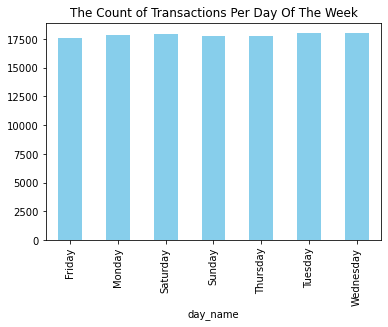

In [33]:
txn.groupby('day_name')['customer_id'].count().plot.bar(color = 'skyblue')
plt.title('The Count of Transactions Per Day Of The Week')

3. Following the same logic as in section 1.2, generate the features that capture the count
of transactions per client, year and day of the week. The intermediate MultiIndex
dataframe (with nlevels=3) and the final pivoted output with a single index are shown
in the snapshots below.

In [34]:
adowc = txn.groupby(['customer_id', 'day_name', 'YEAR'])['tran_amount'].count()
adowc = pd.DataFrame(adowc) 
adowc.columns = ['cnt']
adowcpt = adowc.pivot_table(index = 'customer_id',columns = ['YEAR','day_name']).replace(np.nan, 0).astype(int)

level_0 = adowcpt.columns.get_level_values(0).astype(str)
level_1 = adowcpt.columns.get_level_values(1).astype(str)
level_2 = adowcpt.columns.get_level_values(2).astype(str)

adowcpt.columns = level_0 + '-' + level_1 + '-' + level_2
adowcpt.head()

,cnt-2011-Friday,cnt-2011-Monday,cnt-2011-Saturday,cnt-2011-Sunday,cnt-2011-Thursday,cnt-2011-Tuesday,cnt-2011-Wednesday,cnt-2012-Friday,cnt-2012-Monday,cnt-2012-Saturday,...,cnt-2014-Thursday,cnt-2014-Tuesday,cnt-2014-Wednesday,cnt-2015-Friday,cnt-2015-Monday,cnt-2015-Saturday,cnt-2015-Sunday,cnt-2015-Thursday,cnt-2015-Tuesday,cnt-2015-Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,1,0,0,1,0,0,1,0,0,1,...,1,1,1,0,0,0,0,0,0,1
CS1113,1,1,0,1,0,0,0,2,1,0,...,0,3,0,0,2,0,0,0,0,1
CS1114,0,1,0,1,1,0,2,0,0,1,...,0,1,1,0,0,0,0,1,0,0
CS1115,0,0,1,1,0,0,1,1,1,0,...,2,0,2,0,0,0,0,1,0,0
CS1116,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


4. Confirm that your output has the same number of rows as the final output in section 1.2
and save it as annual day of week counts pivot.xlsx. How many features/columns
did you create in this section?

In [35]:
print('By above, there are 35 columns.')
adowcpt.to_excel("annual_day_of_week_counts_pivot.xlsx")

By above, there are 35 columns.


5. Similarly, generate the features that capture the count of transactions per client,
month-end-date and day of the week. In contrast with the annual pivot table in
the previous step, here you want to create the pivot with [’customer id’, ’ME DT’] as
index to obtain the following output dataframe.

In [36]:
ldc = txn.groupby(['customer_id', 'ME_DT', 'day_name']).count()['tran_amount']
ldc = pd.DataFrame(ldc) 
ldc.columns = ["cnt"]
ldcpt = ldc.pivot_table(index = ['customer_id', 'ME_DT'], columns = ['day_name']).replace(np.nan, 0).astype(int)

level_0 = ldcpt.columns.get_level_values(0).astype(str)
level_1 = ldcpt.columns.get_level_values(1).astype(str)

ldcpt.columns = level_0 + '-' + level_1
ldcpt.head()

cnt-Friday  cnt-Monday  cnt-Saturday  cnt-Sunday  \
customer_id ME_DT                                                          
CS1112      2011-06-30           0           0             0           0   
            2011-08-31           1           0             0           0   
            2011-10-31           0           0             0           1   
            2012-04-30           0           0             0           1   
            2012-06-30           0           0             0           1   

                        cnt-Thursday  cnt-Tuesday  cnt-Wednesday  
customer_id ME_DT                                                 
CS1112      2011-06-30             0            0              1  
            2011-08-31             0            0              0  
            2011-10-31             0            0              0  
            2012-04-30             0            0              0  
            2012-06-30             0            0              0

6. Join with base table pd as you did in section 1.5 and impute with your choice of
value for NaN. Save the final output as mth day counts.xlxs.

In [37]:
mth_day_counts = base_table_pd.join(ldcpt, on = ['CLNT_NO', 'ME_DT'], how = 'left').replace(np.nan, 0)
mth_day_counts.to_excel("mth_day_counts.xlsx")

### 1.7 Date-related features: days since last transaction

In this date-related features set, you want to capture the frequency of the transactions in
terms of the days since the last transaction. This set of features applies only to the monthly
features.
1. The starting point is again the txn table. Recall that most clients have a single
purchase per month, but some clients have multiple purchases in a month. Since
you want to calculate the ”days since last transaction”, you want to capture the last
transaction in a month for every client.
Use the appropriate groupby to create the table last monthly purchase that cap-
tures the last ’txn date’ (aggfunc=max) for every client and month


In [38]:
lmp = txn.groupby(['customer_id', 'ME_DT']).agg(last_monthly_purchase = pd.NamedAgg(column = 'txn_date', aggfunc = 'max'))
lmp.reset_index(inplace = True)
lmp = lmp.rename({'customer_id':'CLNT_NO'}, axis = 'columns')
lmp.head()

,CLNT_NO,ME_DT,last_monthly_purchase
0,CS1112,2011-06-30,2011-06-15
1,CS1112,2011-08-31,2011-08-19
2,CS1112,2011-10-31,2011-10-02
3,CS1112,2012-04-30,2012-04-08
4,CS1112,2012-06-30,2012-06-24


2. Join base table pd with last monthly purchase as you did in section 1.5. The
snapshot below shows the output of the created object last monthly purchase base
for client CS1112 who made her/his first purchase on June 2011, then no purchase on
July and made a purchase again on August 2011. What values will you use to impute
the NaT values here? NaT stands for ”Not a Timestamp”.

In [42]:
last_monthly_purchase_base = pd.merge(base_table_pd, lmp, how = 'left', on = ['CLNT_NO', 'ME_DT'])
last_monthly_purchase_base.sort_values(['CLNT_NO','ME_DT'], inplace = True, ascending = True)
CS1112 = last_monthly_purchase_base.loc[last_monthly_purchase_base.CLNT_NO == 'CS1112']
CS1112.head(8)

,CLNT_NO,ME_DT,last_monthly_purchase
289050,CS1112,2011-05-31,NaT
289051,CS1112,2011-06-30,2011-06-15
289052,CS1112,2011-07-31,NaT
289053,CS1112,2011-08-31,2011-08-19
289054,CS1112,2011-09-30,NaT
289055,CS1112,2011-10-31,2011-10-02
289056,CS1112,2011-11-30,NaT
289057,CS1112,2011-12-31,NaT


Question: What values will you use to impute the NaT values here? NaT stands for ”Not a Timestamp”.

Use the last observation of CS1112 to impute the NaT values.

3. To answer the imputation problem, we have to think what value should we use for say
July 2011 for ’last monthly purchase’ ? The answer is that in July the value for the
last monthly purchase is the previous line value: 2011-06-15. In other words, for every
client we want to forward-fill the NaT values.
While pandas fillna() method has a method to forward-fill, here we want to use the
apply and a lambda function with the forward-fill function ffill(), with the follow-
ing expression: .apply(lambda x: x.ffill()) applied on object last monthly -
purchase base grouped by CLNT NO. Below, I am showing a snapshot for lines
[92:98] that confirm the transition between clients CS1113 and CS1114.
You can also recreate the forward-fill with the fillna() method, however there is a
disadvantage and a reason the .apply() method is preferred here.
The forward-fill on the grouped by CLNT NO object is expected to leave NaT values
for the first months of every client until they purchase something. The above snapshot
confirms that for client CS1114.

In [43]:
last_monthly_purchase_base = last_monthly_purchase_base.groupby(['CLNT_NO']).apply(lambda x: x.ffill())
last_monthly_purchase_base[last_monthly_purchase_base['CLNT_NO'] == 'CS1113']

,CLNT_NO,ME_DT,last_monthly_purchase
322044,CS1113,2011-05-31,2011-05-27
322045,CS1113,2011-06-30,2011-05-27
322046,CS1113,2011-07-31,2011-07-25
322047,CS1113,2011-08-31,2011-07-25
322048,CS1113,2011-09-30,2011-07-25
322049,CS1113,2011-10-31,2011-10-23
322050,CS1113,2011-11-30,2011-10-23
322051,CS1113,2011-12-31,2011-10-23
322052,CS1113,2012-01-31,2011-10-23
322053,CS1113,2012-02-29,2011-10-23


In [44]:
last_monthly_purchase_base[last_monthly_purchase_base['CLNT_NO'] == 'CS1114']

,CLNT_NO,ME_DT,last_monthly_purchase
23500,CS1114,2011-05-31,NaT
23501,CS1114,2011-06-30,NaT
23502,CS1114,2011-07-31,2011-07-14
23503,CS1114,2011-08-31,2011-08-24
23504,CS1114,2011-09-30,2011-09-19
23505,CS1114,2011-10-31,2011-09-19
23506,CS1114,2011-11-30,2011-09-19
23507,CS1114,2011-12-31,2011-09-19
23508,CS1114,2012-01-31,2011-09-19
23509,CS1114,2012-02-29,2011-09-19


4. Subtract the two date columns and convert the output to .dt.days to calculate the
column ’days since last txn’ as shown in the following snapshot.

In [46]:
m = list(np.array(last_monthly_purchase_base['ME_DT']))
l = list(np.array(last_monthly_purchase_base['last_monthly_purchase']))

lst = []
for r in range(len(m)):
  x = pd.to_datetime(m[r])
  y = pd.to_datetime(l[r])
  d = pd.Timedelta(x - y)
  lst.append(d.days)

last_monthly_purchase_base['days_since_last_txn'] = lst
last_monthly_purchase_base[last_monthly_purchase_base['CLNT_NO'] == 'CS1112']

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
289050,CS1112,2011-05-31,NaT,NaN
289051,CS1112,2011-06-30,2011-06-15,15.0
289052,CS1112,2011-07-31,2011-06-15,46.0
289053,CS1112,2011-08-31,2011-08-19,12.0
289054,CS1112,2011-09-30,2011-08-19,42.0
289055,CS1112,2011-10-31,2011-10-02,29.0
289056,CS1112,2011-11-30,2011-10-02,59.0
289057,CS1112,2011-12-31,2011-10-02,90.0
289058,CS1112,2012-01-31,2011-10-02,121.0
289059,CS1112,2012-02-29,2011-10-02,150.0


5.Plot a histogram of the ’days since last txn’. Based on the values you observe in the
histogram, impute the remaining NaN values (i.e. for the initial months before a client
makes a purchase). Save the columns [’CLNT NO’, ’ME DT’, ’days since last txn’] as
days since last txn.xlsx.

Text(0.5, 1.0, 'Day Since Last TXN')

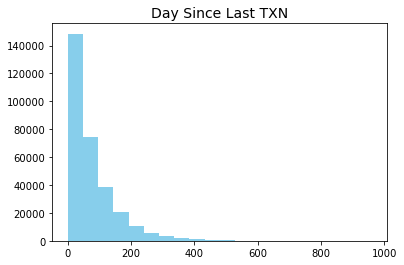

In [47]:
plt.hist(last_monthly_purchase_base['days_since_last_txn'], bins = 20, color = 'skyblue')
plt.title('Day Since Last TXN', fontsize = 14)

From the above histogram, most gap dates is between 0 and 100, so it is reasonable to put a 50 as the NaN value. 

In [48]:
last_monthly_purchase_base.days_since_last_txn = last_monthly_purchase_base.days_since_last_txn.fillna(50)
last_monthly_purchase_base

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
289050,CS1112,2011-05-31,NaT,50.0
289051,CS1112,2011-06-30,2011-06-15,15.0
289052,CS1112,2011-07-31,2011-06-15,46.0
289053,CS1112,2011-08-31,2011-08-19,12.0
289054,CS1112,2011-09-30,2011-08-19,42.0
...,...,...,...,...
239131,CS9000,2014-11-30,2014-08-24,98.0
239132,CS9000,2014-12-31,2014-08-24,129.0
239133,CS9000,2015-01-31,2014-08-24,160.0
239134,CS9000,2015-02-28,2015-02-28,0.0


In [49]:
last_monthly_purchase_base[['CLNT_NO', 'ME_DT', 'days_since_last_txn']].to_excel("days_since_last_txn.xlsx")